In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
def checkNull():
    
    print("Checking for null values...\n")
    count = 0
    
    for i in df.columns:
        if(i == np.where(pd.isnull(i))):
            count += 1
    if (count>0):
        print(str(count) + "columns contain null values")
    else:
        print("No column contains null values")
    
    return 

In [4]:
def splitFrame():
    
    print("Spilting the data into two features and target variable assuming last column to be the target variable...")
    
    X = df.iloc[:,: -1]
    y = df.iloc[:,-1]
    
    return (X, y)

In [5]:
def tr_ts_split(scaled_X,y):
    
    print("\nPerforming train-test split... (Default train size = 0.7)")
    
    X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=101)
    
    return (X_train, X_test, y_train, y_test)

In [6]:
def printRes(k, y_test, pred):
    
    print("Displaying Results:")
    print('\nWITH K = ',k)
    print('\nConfusion Matrix')
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n\nClassificaation Report')
    print('\n')
    print(classification_report(y_test,pred))

In [7]:
def kPlot(X_train, X_test, y_test, y_train):
    
    plt.figure(figsize=(10,6))
    error_rate = []

    for i in range(1,51):
    
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

    plt.plot(range(1,51),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
    
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()

In [8]:
def setK():
    k = 0
    res = 1
    ch = input("Choose another K value (Y/N)?: ")
    if (ch == "Y" or ch == "y"):
        k = int(input("Enter K: "))
    else:
        res = 0
        print("okay!")
    
    return (res,k)    

In [14]:
def makePred(X, knn):

    ch = input("Make Prediction (Y/N)?: ")
    print("----------------------------------------------")
    if (ch=="Y" or ch =='y'):
        vals = []
        for i in range(X.shape[1]):
            val = float(input("Enter value for column " + str(i) + ": "))
            vals.append(val)
        print("----------------------------------------------")
        print("Predicted Class: ", knn.predict([vals]))
    
    else:
        print("okay!")

In [10]:
def KNN():
    
    k = 15
    
    checkNull()
    
    print("\nStarting KNN..")
    print("----------------------------------------------")
    
    X, y = splitFrame()
    
    print("\nStandardizing variables..")
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_X = scaler.transform(X)
    
    X_train, X_test, y_train, y_test = tr_ts_split(scaled_X, y)
    
    print("\n(Default K value is 15)")
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    
    pred = knn.predict(X_test)
   
    print("\nTask Completed")
    print("----------------------------------------------")
    printRes(k, y_test, pred)
    
    kPlot(X_train, X_test, y_test, y_train) 
    
    makePred(X, knn)
    
    res, k = setK()
    if(res):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train,y_train)
        pred = knn.predict(X_test)
        printRes(k, y_test, pred)
        
        makePred(X, knn)
    

Checking for null values...

No column contains null values

Starting KNN..
----------------------------------------------
Spilting the data into two features and target variable assuming last column to be the target variable...

Standardizing variables..

Performing train-test split... (Default train size = 0.7)

(Default K value is 15)

Task Completed
----------------------------------------------
Displaying Results:

WITH K =  15

Confusion Matrix


[[151   8]
 [  9 132]]


Classificaation Report


              precision    recall  f1-score   support

           0       0.94      0.95      0.95       159
           1       0.94      0.94      0.94       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



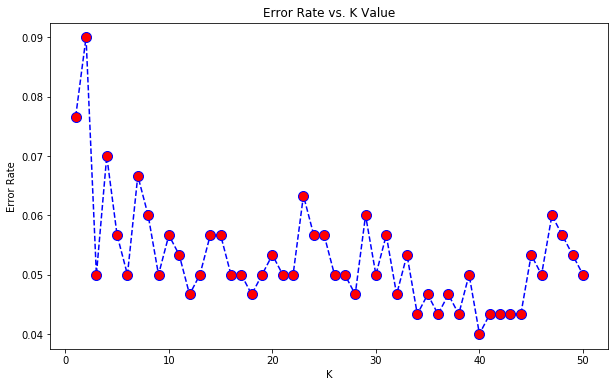

Make Prediction (Y/N)?: n
----------------------------------------------
okay!
Choose another K value (Y/N)?: y
Enter K: 23
Displaying Results:

WITH K =  23

Confusion Matrix


[[150   9]
 [ 10 131]]


Classificaation Report


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       159
           1       0.94      0.93      0.93       141

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

Make Prediction (Y/N)?: y
----------------------------------------------
Enter value for column 0: 1
Enter value for column 1: 2
Enter value for column 2: 3
Enter value for column 3: 4
Enter value for column 4: 5
Enter value for column 5: 6
Enter value for column 6: 7
Enter value for column 7: 8
Enter value for column 8: 9
Enter value for column 9: 10
----------------------------------------------
Predicted Class:  [0]


In [15]:
KNN()